### Testing and Evaluation on Collaborative Filtering with User Demogrpahic Clustering

In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gower

# import functions
import Metrics
import CF
import CF_clust1
import CF_clust2
import kmedoids

In [3]:
# reads in the 100k user rating data set
u100k = pd.read_csv('u.data', sep='\t', names=['userID', 'filmID', 'rating', 'timestamp'])

# reads in the 1m user rating data set
u1m = pd.read_csv('ratings.dat', sep='::', names=['userID', 'filmID', 'rating', 'timestamp'], engine ='python')

# reads in the user demographic information data set
u100k_info = pd.read_csv('u.user', sep='|', names=['userID', 'age', 'gender', 'occupation', 'zip'])

In [4]:
u100k_info

,userID,age,gender,occupation,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [5]:
# do not include zip or userID
u100k_dem = pd.DataFrame.to_numpy(u100k_info)[:,1:3]

# convert the categorical variable gender into 1 and 0
gender_map = {'M': 1, 'F': -1}
u100k_dem[:,1] = u100k_info['gender'].map(gender_map)

# convert occupation into dummy variables
u100k_dem = np.hstack((u100k_dem, pd.DataFrame.to_numpy(pd.get_dummies(u100k_info['occupation']))))

In [6]:
# standardise continuous data
u100k_dem[:,0] = CF_clust2.standardise(u100k_dem[:,0])

# standardise categorical data
u100k_dem[:,2:] = u100k_dem[:,2:]*CF_clust2.dis_fac(18, 943, sum(u100k_dem)[2:])

In [7]:
# construct euclidean Hennig-Liao matrix
sim = Metrics.gen_euc(u100k_dem, True)
HL = 1/sim-1

# conduct PAM clustering using kmedoids library for varying k
k_clust_range = np.arange(2,7)
km = [kmedoids.pam_build(HL, k) for k in k_clust_range]

# sorted cluster labels for each user
dem_cluster = [np.argsort(HL[:, km[i].medoids], axis=1) for i in range(5)]

In [8]:
# create the user demographic clusters
cluster_ind = [[np.where(km[j].labels==i)[0] for i in range(k)] for j,k in enumerate(k_clust_range)]
sim_cluster_ind = [np.concatenate([c for c in cluster_ind[j]]) for j in range(len(k_clust_range))]

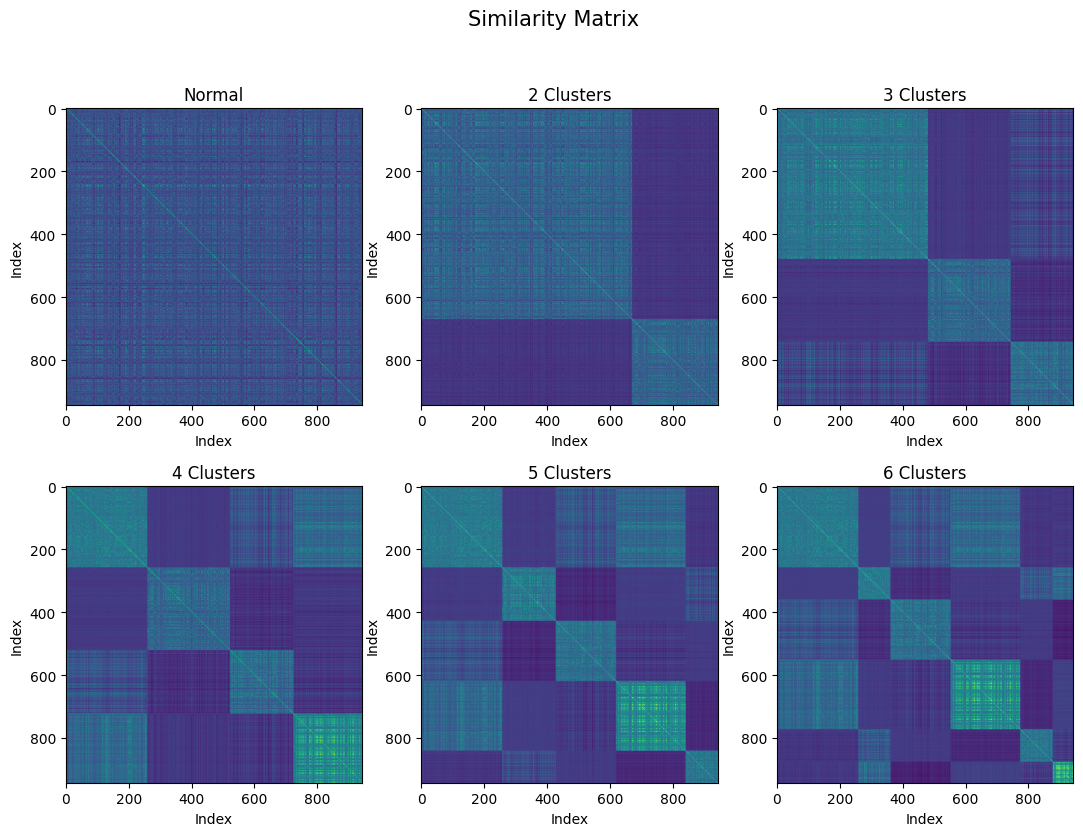

In [9]:
# plot heatmaps of the similarity matrix sorted by clusters
plt.figure(figsize=(13,9))
plt.suptitle("Similarity Matrix", size=15)

plt.subplot(2, 3, 1)
plt.imshow(sim)
plt.title('Normal')
plt.xlabel('Index')
plt.ylabel('Index')

for i in range(5):
    plt.subplot(2,3,i+2)
    plt.imshow(sim[np.ix_(sim_cluster_ind[i], sim_cluster_ind[i])])
    plt.title(f'{i+2} Clusters')
    plt.xlabel('Index')
    plt.ylabel('Index')

In [10]:
k_range = np.arange(10,301,10)

In [11]:
cluster_euc_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range)
euc_eval_test = CF.cross_val(u100k, 10, Metrics.gen_euc, k_range)
dem_euc_eval_test_2 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[0])
dem_euc_eval_test_3 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[1])
dem_euc_eval_test_4 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[2])
dem_euc_eval_test_5 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[3])
dem_euc_eval_test_6 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[4])

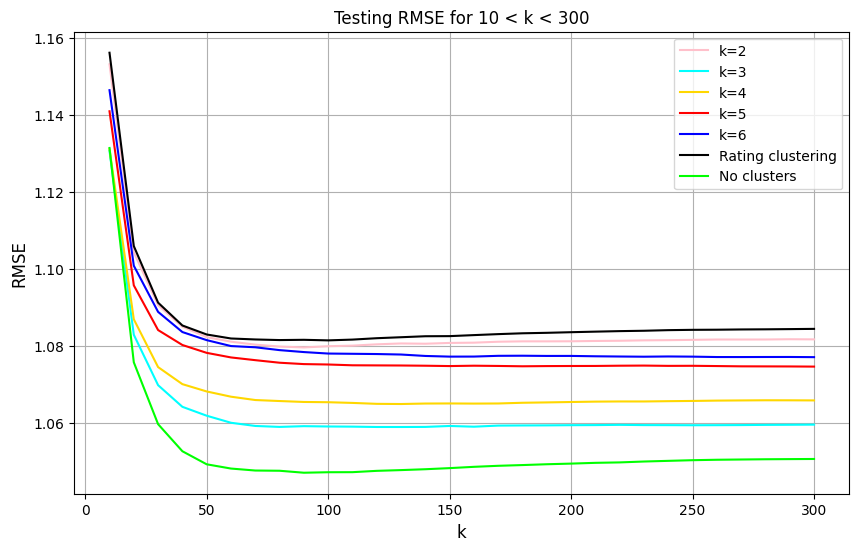

In [12]:
plt.figure(figsize=(10,6))
plt.title("Testing RMSE for 10 < k < 300", size=12)
plt.plot(k_range, dem_euc_eval_test_2[0], label = 'k=2', color='pink')
plt.plot(k_range, dem_euc_eval_test_3[0], label = 'k=3', color='aqua')
plt.plot(k_range, dem_euc_eval_test_4[0], label = 'k=4', color='gold')
plt.plot(k_range, dem_euc_eval_test_5[0], label = 'k=5', color='red')
plt.plot(k_range, dem_euc_eval_test_6[0], label = 'k=6', color='blue')
plt.plot(k_range, cluster_euc_eval_test[0], label = 'Rating clustering', color='black')
plt.plot(k_range, euc_eval_test[0], label = 'No clusters', color='lime')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('RMSE', size=12)
plt.xlabel('k', size=12)
plt.show()

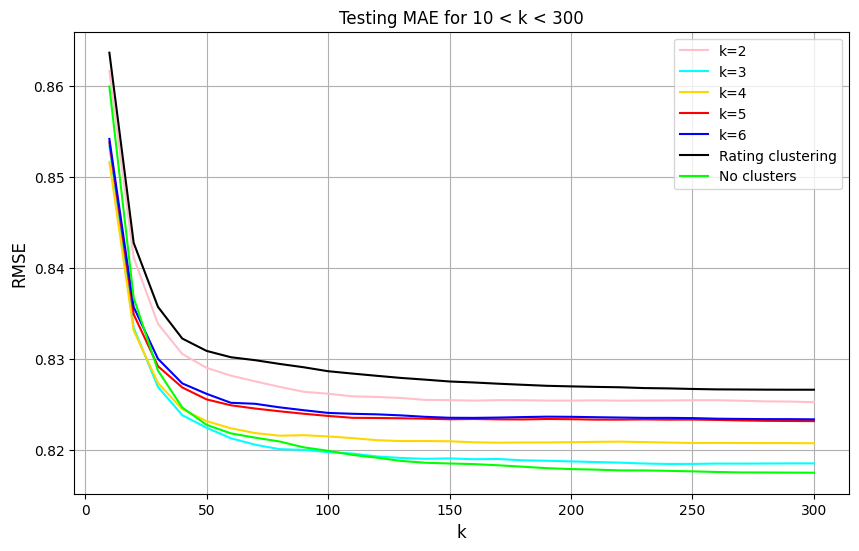

In [13]:
plt.figure(figsize=(10,6))
plt.title("Testing MAE for 10 < k < 300", size=12)
plt.plot(k_range, dem_euc_eval_test_2[1], label = 'k=2', color='pink')
plt.plot(k_range, dem_euc_eval_test_3[1], label = 'k=3', color='aqua')
plt.plot(k_range, dem_euc_eval_test_4[1], label = 'k=4', color='gold')
plt.plot(k_range, dem_euc_eval_test_5[1], label = 'k=5', color='red')
plt.plot(k_range, dem_euc_eval_test_6[1], label = 'k=6', color='blue')
plt.plot(k_range, cluster_euc_eval_test[1], label = 'Rating clustering', color='black')
plt.plot(k_range, euc_eval_test[1], label = 'No clusters', color='lime')
plt.grid()
plt.legend(loc = 'upper right')
plt.ylabel('RMSE', size=12)
plt.xlabel('k', size=12)
plt.show()

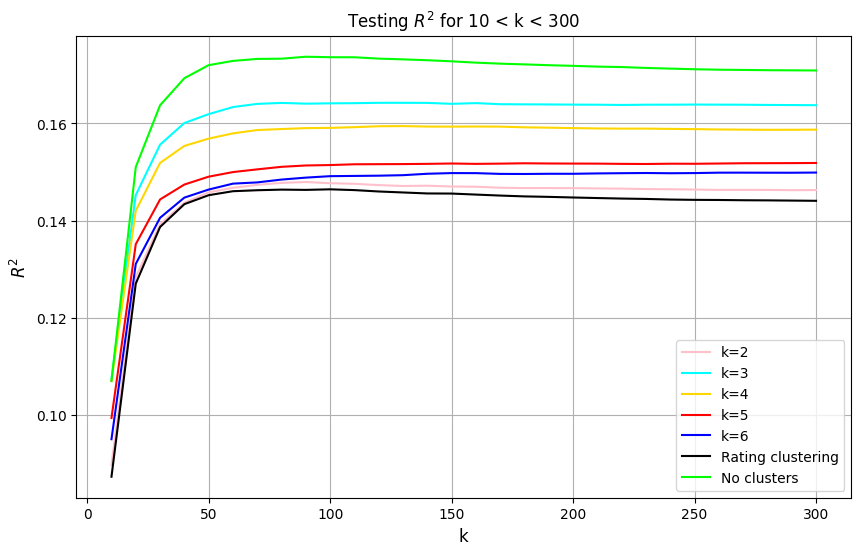

In [14]:
plt.figure(figsize=(10,6))
plt.title(r"Testing $R^2$ for 10 < k < 300", size=12)
plt.plot(k_range, dem_euc_eval_test_2[2], label = 'k=2', color='pink')
plt.plot(k_range, dem_euc_eval_test_3[2], label = 'k=3', color='aqua')
plt.plot(k_range, dem_euc_eval_test_4[2], label = 'k=4', color='gold')
plt.plot(k_range, dem_euc_eval_test_5[2], label = 'k=5', color='red')
plt.plot(k_range, dem_euc_eval_test_6[2], label = 'k=6', color='blue')
plt.plot(k_range, cluster_euc_eval_test[2], label = 'Rating clustering', color='black')
plt.plot(k_range, euc_eval_test[2], label = 'No clusters', color='lime')
plt.grid()
plt.legend(loc = 'lower right')
plt.ylabel(r'$R^2$', size=12)
plt.xlabel('k', size=12)
plt.show()

In [26]:
# generate Gower similarity 
Gow = gower.gower_matrix(u100k_info[['age','gender','occupation']])
sim = 1-Gow

# conduct PAM clustering using kmedoids library for varying k
k_clust_range = np.arange(2,7)
km = [kmedoids.pam_build(Gow, k) for k in k_clust_range]

# sorted cluster labels for each user
dem_cluster = [np.argsort(Gow[:, km[i].medoids], axis=1) for i in range(5)]

In [27]:
# create the user demographic clusters
cluster_ind = [[np.where(km[j].labels==i)[0] for i in range(k)] for j,k in enumerate(k_clust_range)]
sim_cluster_ind = [np.concatenate([c for c in cluster_ind[j]]) for j in range(len(k_clust_range))]

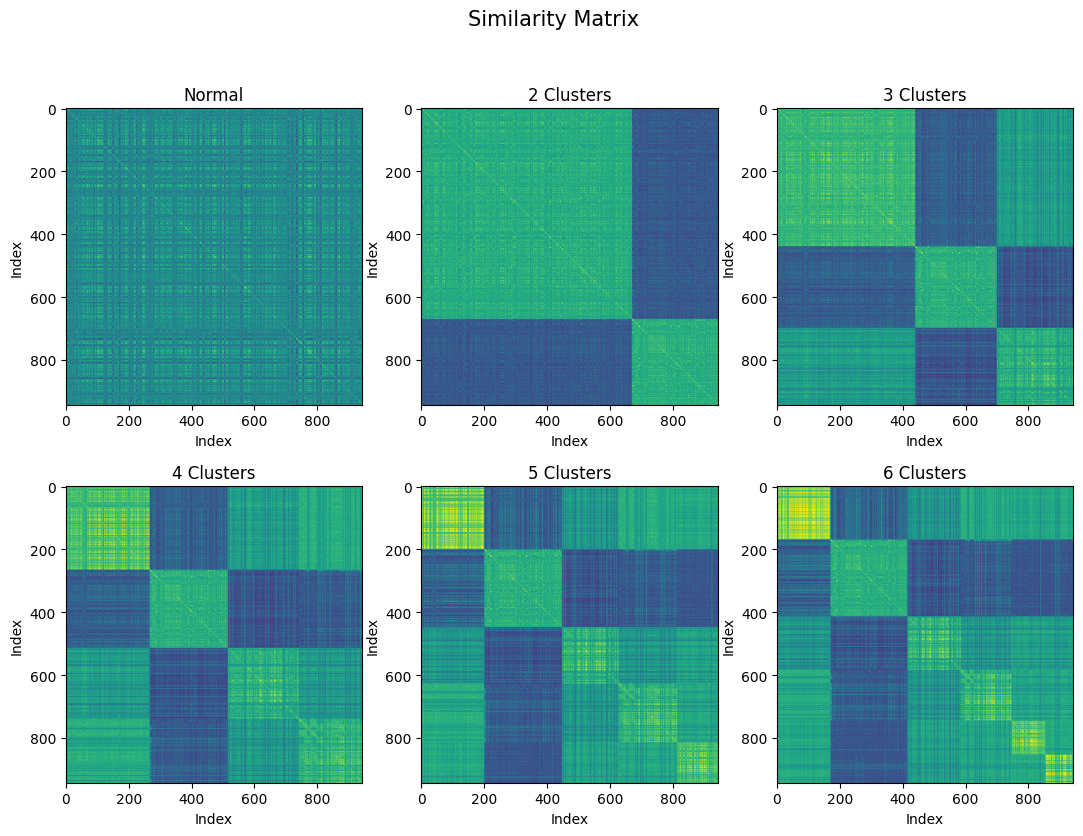

In [28]:
# plot heatmaps of the similarity matrix sorted by clusters
plt.figure(figsize=(13,9))
plt.suptitle("Similarity Matrix", size=15)

plt.subplot(2, 3, 1)
plt.imshow(sim)
plt.title('Normal')
plt.xlabel('Index')
plt.ylabel('Index')

for i in range(5):
    plt.subplot(2,3,i+2)
    plt.imshow(sim[np.ix_(sim_cluster_ind[i], sim_cluster_ind[i])])
    plt.title(f'{i+2} Clusters')
    plt.xlabel('Index')
    plt.ylabel('Index')

In [29]:
cluster_euc_eval_test = CF_clust1.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range)
euc_eval_test = CF.cross_val(u100k, 10, Metrics.gen_euc, k_range)
dem_euc_eval_test_2 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[0])
dem_euc_eval_test_3 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[1])
dem_euc_eval_test_4 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[2])
dem_euc_eval_test_5 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[3])
dem_euc_eval_test_6 = CF_clust2.cluster_cross_val(u100k, 10, Metrics.gen_euc, k_range, dem_cluster[4])

KeyboardInterrupt: 